In [ ]:
!pip install ultralytics opencv-python tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.8/782.8 kB 7.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import cv2

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Function to create directories
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Create directories for images and labels
create_dir('mnist/train/images')
create_dir('mnist/train/labels')
create_dir('mnist/val/images')
create_dir('mnist/val/labels')

# Save images and labels
def save_images_and_labels(images, labels, split):
    for i, (image, label) in enumerate(zip(images, labels)):
        # Convert grayscale image to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

        # Save image
        image_path = f'mnist/{split}/images/{i}.jpg'
        cv2.imwrite(image_path, image_rgb)

        # Save label in YOLO format (class x_center y_center width height)
        h, w = image.shape
        x_center, y_center = w / 2, h / 2
        bbox_width, bbox_height = w, h
        label_path = f'mnist/{split}/labels/{i}.txt'
        with open(label_path, 'w') as f:
            f.write(f'{label} {x_center/w} {y_center/h} {bbox_width/w} {bbox_height/h}\n')

# Save training and validation data
save_images_and_labels(train_images, train_labels, 'train')
save_images_and_labels(test_images, test_labels, 'val')


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # You can choose different pre-trained models: yolov8n.pt, yolov8s.pt, etc.

# Train the model on your dataset
model.train(data='/content/mnist.yaml', epochs=2, imgsz=64) # MNIST images are 28x28, but YOLOv8 expects at least 32x32


Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/mnist.yaml, epochs=2, time=None, patience=100, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

100%|██████████| 755k/755k [00:00<00:00, 14.9MB/s]

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    753262  ultralytics.nn.modules.head.Detect           [10, [64, 128, 256]]          
Model summary: 225 layers, 3012798 parameters, 3012782 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/detect/train2', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /content/mnist/train/labels... 60000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60000/60000 [00:37<00:00, 1613.06it/s]


train: New cache created: /content/mnist/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/mnist/val/labels... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:06<00:00, 1544.26it/s]


val: New cache created: /content/mnist/val/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 64 train, 64 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2         0G     0.9591      2.134      1.118         49         64: 100%|██████████| 3750/3750 [20:56<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [01:45<00:00,  2.98it/s]


                   all      10000      10000      0.459      0.554      0.483      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2         0G     0.6015      1.086     0.9868         49         64: 100%|██████████| 3750/3750 [20:25<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [01:54<00:00,  2.72it/s]


                   all      10000      10000      0.559      0.591      0.543      0.346

2 epochs completed in 0.754 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [01:52<00:00,  2.78it/s]


                   all      10000      10000      0.563      0.593      0.548       0.35
                     0        980        980      0.562      0.872      0.616      0.428
                     1       1135       1135      0.125      0.981       0.39      0.203
                     2       1032       1032      0.524      0.354      0.361      0.124
                     3       1010       1010      0.551      0.593      0.605      0.359
                     4        982        982      0.567      0.899      0.882        0.7
                     5        892        892      0.639      0.279      0.404      0.207
                     6        958        958      0.766      0.493      0.651      0.441
                     7       1028       1028      0.361      0.577      0.432      0.261
                     8        974        974      0.634      0.821      0.804      0.576
                     9       1009       1009      0.902     0.0638      0.337      0.198
Speed: 0.1ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c1dfcd23bb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train2/weights/best.pt" conf=0.5 source="/content/mnist/val/images/1007.jpg" save=True

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/mnist/val/images/1007.jpg: 64x64 1 8, 22.3ms
Speed: 1.1ms preprocess, 22.3ms inference, 9.5ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


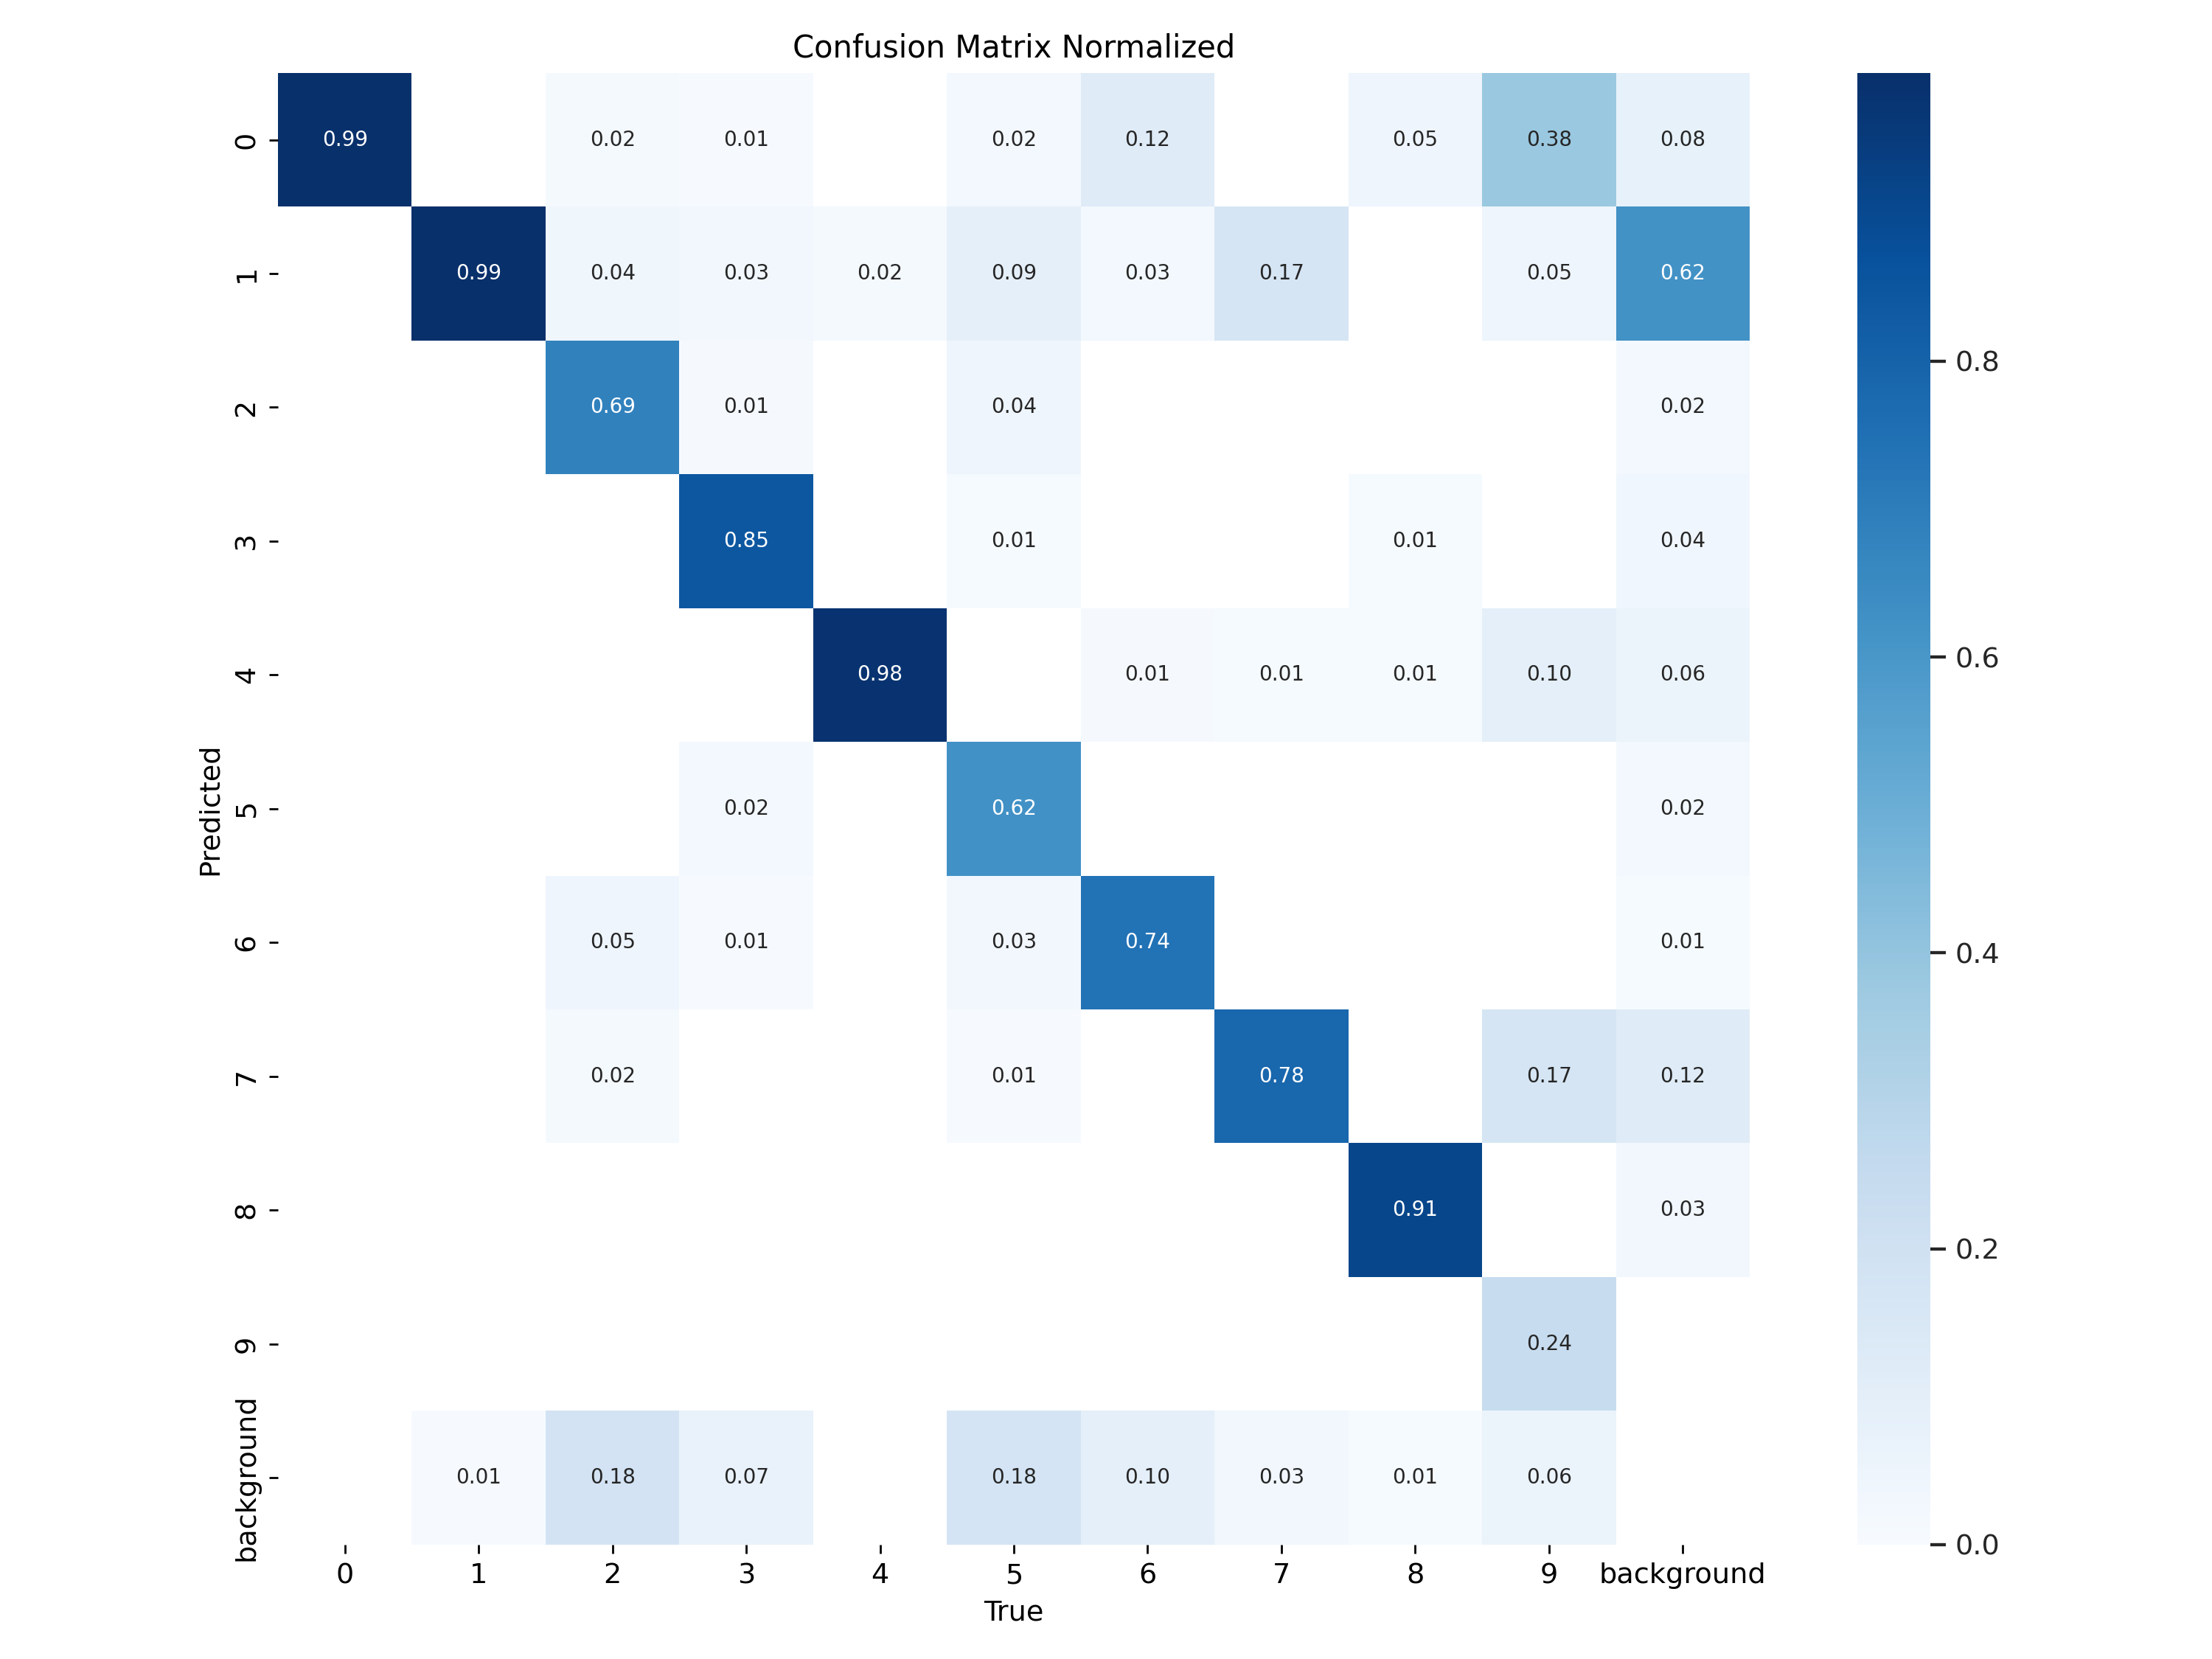

In [ ]:
from IPython.display import Image


display(Image(filename='/content/runs/detect/train2/confusion_matrix_normalized.png', width=600))

In [ ]:
save_dir = '/content/predictions'

In [ ]:
import cv2
import torch
import matplotlib.pyplot as plt

def detect_characters(image_path):
    # Run inference on the image using YOLOv5
    results = model.predict(source=image_path, save=True)

    # Load the original image
    image = cv2.imread(image_path)

    # Extract predictions and annotate the image
    objects_detected = []
    descriptions = []

    for result in results:
        for box in result.boxes:
            # Extract class label, confidence, and bounding box coordinates
            label_id = int(box.cls[0])
            class_label = result.names[int(box.cls[0])]
            confidence = box.conf[0].item()
            bbox_coords = box.xyxy[0].tolist()

            # Append detected object info to list
            objects_detected.append({
                'label_id': label_id,
                'class_label': class_label,
                'confidence': confidence,
                'bbox': bbox_coords
            })

            # Extract the bounding box coordinates
            x_min, y_min, x_max, y_max = map(int, bbox_coords)

            # Annotate the image with bounding box and class label
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.putText(image, f'{class_label} {confidence:.2f}', (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

            # Crop the detected region for digit recognition
            cropped_image = image[y_min:y_max, x_min:x_max]

            # Generate description
            descriptions.append(f"Detected a {class_label} with confidence {confidence:.2f}")

    # Save the annotated image
    output_path = f"{save_dir}/annotated_image.jpg"
    cv2.imwrite(output_path, image)

    # Generate final text output
    final_description = "Detected objects: " + ", ".join(descriptions)

    # Display the annotated image in the notebook
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(final_description)
    plt.show()

    return objects_detected, output_path, final_description


image 1/1 /content/mnist/val/images/1007.jpg: 64x64 1 8, 48.4ms
Speed: 0.6ms preprocess, 48.4ms inference, 1.5ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/detect/train22


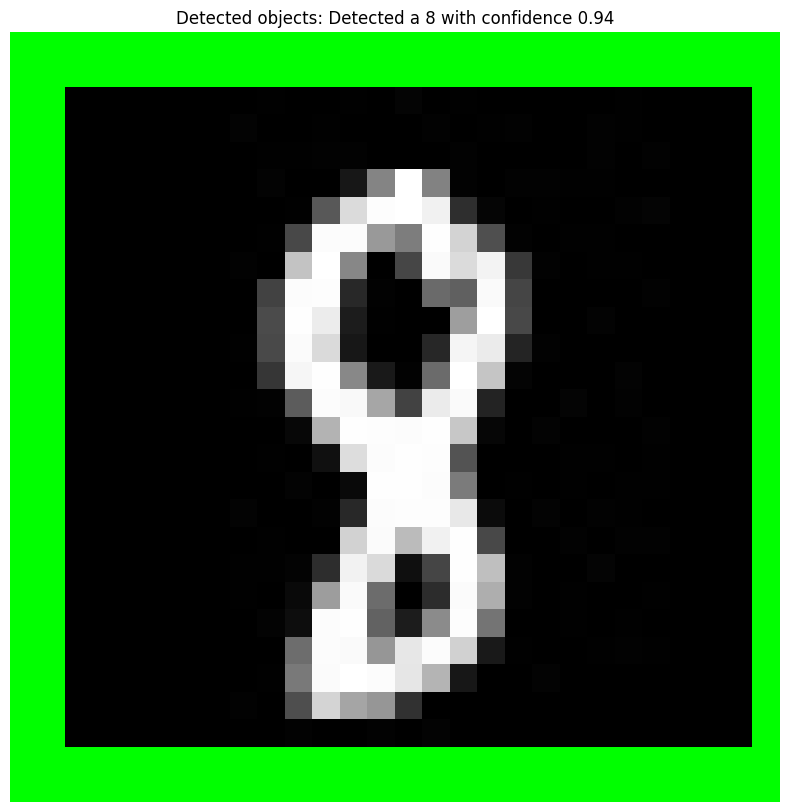

In [ ]:
objects_detected, annotated_image_path, final_description = detect_characters('/content/mnist/val/images/1007.jpg')

In [ ]:
print("Detected objects:", objects_detected)
print("Annotated image saved at:", annotated_image_path)
print("Description:", final_description)

Detected objects: [{'label_id': 8, 'class_label': '8', 'confidence': 0.9430226683616638, 'bbox': [0.6420974731445312, 0.7717098593711853, 28.0, 27.688562393188477]}]
Annotated image saved at: /content/predictions/annotated_image.jpg
Description: Detected objects: Detected a 8 with confidence 0.94



image 1/1 /content/mnist/train/images/0.jpg: 64x64 1 3, 22.5ms
Speed: 0.5ms preprocess, 22.5ms inference, 1.0ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/detect/train23


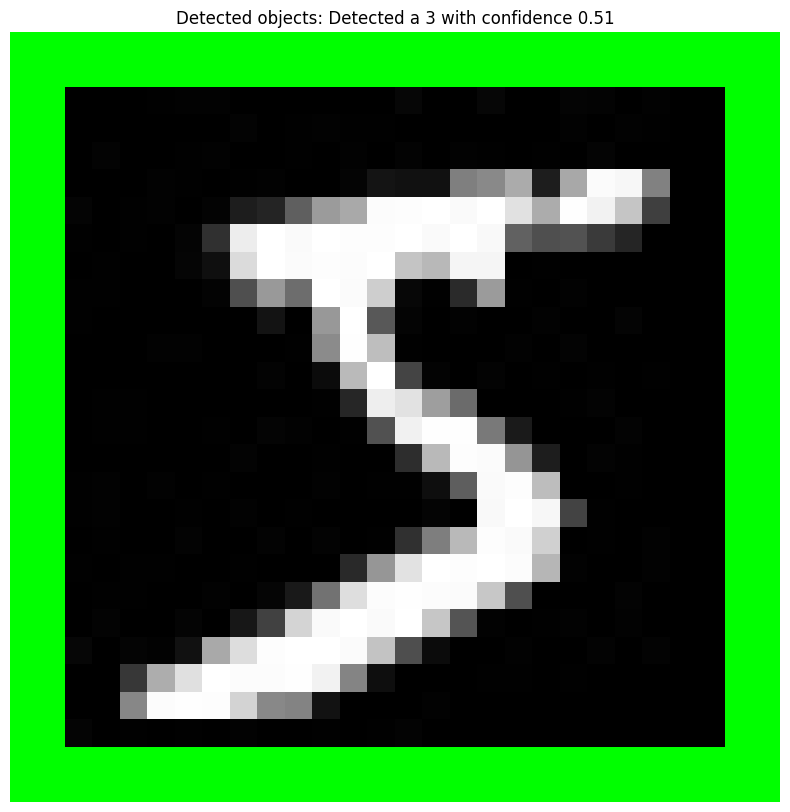

In [ ]:
objects_detected, annotated_image_path, final_description = detect_characters('/content/mnist/train/images/0.jpg')

In [ ]:
print("Detected objects:", objects_detected)
print("Annotated image saved at:", annotated_image_path)
print("Description:", final_description)

Detected objects: [{'label_id': 3, 'class_label': '3', 'confidence': 0.5142533183097839, 'bbox': [0.9437323212623596, 0.07518362998962402, 27.94316864013672, 27.776708602905273]}]
Annotated image saved at: /content/predictions/annotated_image.jpg
Description: Detected objects: Detected a 3 with confidence 0.51



image 1/1 /content/mnist/train/images/1000.jpg: 64x64 1 0, 20.8ms
Speed: 0.5ms preprocess, 20.8ms inference, 1.0ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/detect/train24


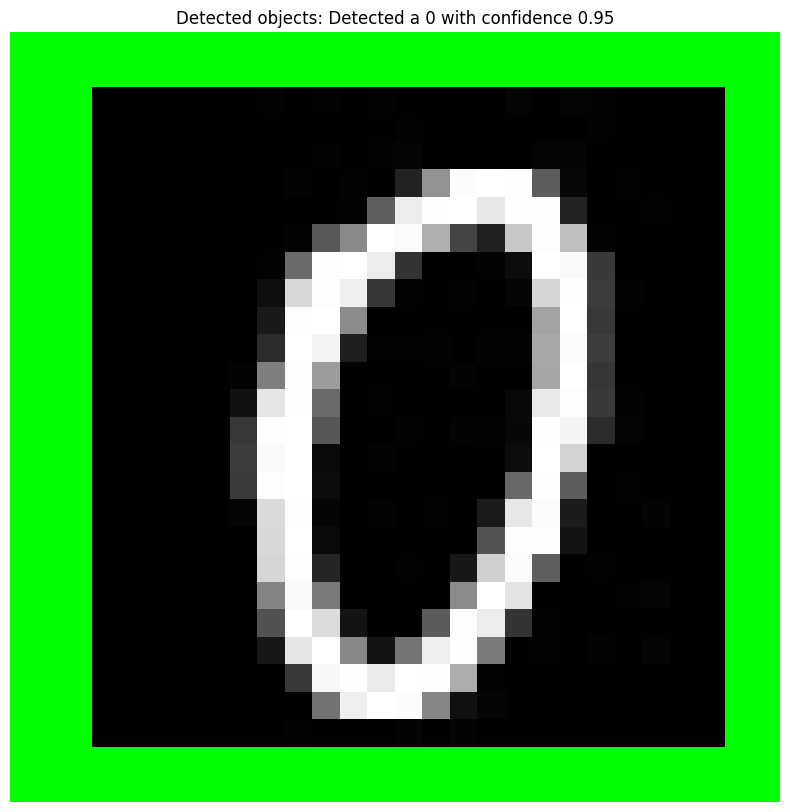

In [ ]:
objects_detected, annotated_image_path, final_description = detect_characters('/content/mnist/train/images/1000.jpg')

In [ ]:
print("Detected objects:", objects_detected)
print("Annotated image saved at:", annotated_image_path)
print("Description:", final_description)

Detected objects: [{'label_id': 0, 'class_label': '0', 'confidence': 0.9464280009269714, 'bbox': [1.1639752388000488, 0.5203039646148682, 27.90336036682129, 27.82329750061035]}]
Annotated image saved at: /content/predictions/annotated_image.jpg
Description: Detected objects: Detected a 0 with confidence 0.95



image 1/1 /content/mnist/train/images/10265.jpg: 64x64 1 2, 26.4ms
Speed: 0.5ms preprocess, 26.4ms inference, 6.9ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/detect/train25


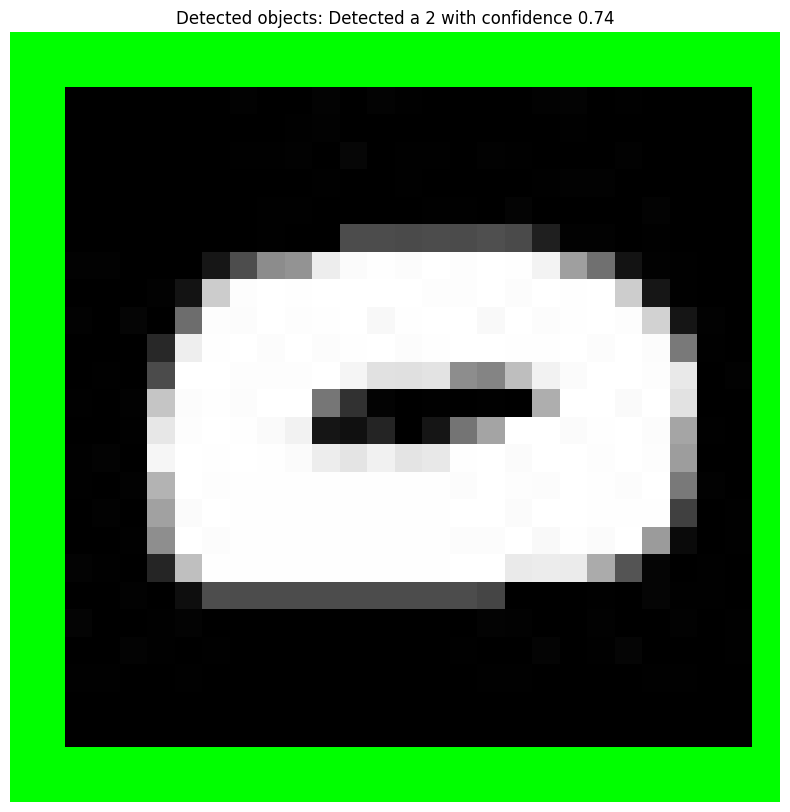

In [ ]:
objects_detected, annotated_image_path, final_description = detect_characters('/content/mnist/train/images/10265.jpg')

In [ ]:
print("Detected objects:", objects_detected)
print("Annotated image saved at:", annotated_image_path)
print("Description:", final_description)

Detected objects: [{'label_id': 2, 'class_label': '2', 'confidence': 0.7422927618026733, 'bbox': [0.27015888690948486, 0.10604047030210495, 28.0, 27.515256881713867]}]
Annotated image saved at: /content/predictions/annotated_image.jpg
Description: Detected objects: Detected a 2 with confidence 0.74



image 1/1 /content/mnist/train/images/1002.jpg: 64x64 1 1, 96.2ms
Speed: 0.6ms preprocess, 96.2ms inference, 1.2ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/detect/train28


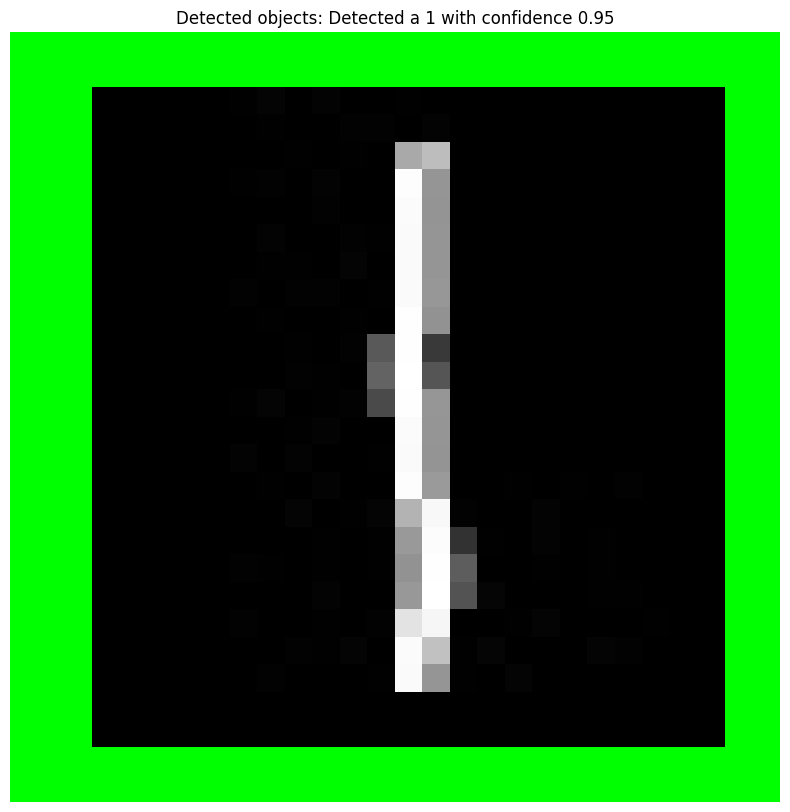

In [ ]:
objects_detected, annotated_image_path, final_description = detect_characters('/content/mnist/train/images/1002.jpg')

# **✈ Demployment using Gradio**

In [ ]:
model.save('trained_model.pt')


In [ ]:
pip install gradio

In [ ]:
pip install ultralytics

In [ ]:
import gradio as gr
import PIL.Image as Image
import numpy as np
from ultralytics import YOLO

# Load the saved model
model = YOLO('trained_model.pt')  # Update this path as necessary
print("Model loaded successfully")
def detect_characters(img, conf_threshold, iou_threshold):
    """Predicts and plots labeled objects in an image using a trained YOLO model with adjustable confidence and IOU thresholds."""
    try:
        # Convert PIL image to numpy array
        img_array = np.array(img)
        print("Image converted to numpy array")

        # Make predictions
        results = model.predict(
            source=img_array,
            conf=conf_threshold,
            iou=iou_threshold,
            show_labels=True,
            show_conf=True,
            imgsz=28,  # Adjust the image size if necessary
        )
        print("Model prediction complete")

        # Initialize variables for description
        descriptions = []

        # Process results and prepare the annotated image
        for result in results:
            im_array = result.plot()
            for box in result.boxes:
                label_id = int(box.cls[0])
                class_label = result.names[label_id]
                confidence = box.conf[0].item()
                descriptions.append(f"Detected a {class_label} with confidence {confidence:.2f}")
                print(f"Label ID: {label_id}, Class Label: {class_label}, Confidence: {confidence}")

        # Convert the plotted array back to a PIL image
        im = Image.fromarray(im_array[..., ::-1])
        print("Annotated image created")

        # Generate final text output
        final_description = "Detected objects: " + ", ".join(descriptions)
        print(f"Final Description: {final_description}")

        return im, final_description
    except Exception as e:
        print(f"Error during prediction: {e}")
        return img, "Error during prediction"

iface = gr.Interface(
    fn=detect_characters,
    inputs=[
        gr.Image(type="pil", label="Upload Image"),
        gr.Slider(minimum=0, maximum=1, value=0.5, label="Confidence threshold"),
        gr.Slider(minimum=0, maximum=1, value=0.45, label="IoU threshold"),
    ],
    outputs=[
        gr.Image(type="pil", label="Annotated Image"),
        gr.Text(label="Description")
    ],
    title="Handwritten Character Recognition",
    description="Upload images of handwritten characters for recognition. The trained YOLO model is used by default.",
    examples=[
        ["/content/mnist/val/images/1007.jpg", 0.5, 0.45],
    ],
)

if __name__ == "__main__":
    iface.launch()
